## Start The Project

In [1]:
# prompt: import important library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



# *Data Cleaning*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
df.nunique()

,0
id,10865
imdb_id,10855
popularity,10814
budget,557
revenue,4702
original_title,10571
cast,10719
homepage,2896
director,5067
tagline,7997


In [8]:
df.vote_average

,vote_average
0,6.5
1,7.1
2,6.3
3,7.5
4,7.3
...,...
10861,7.4
10862,5.7
10863,6.5
10864,5.4


In [9]:
# Find and drop duplicate rows
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

In [10]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
# dropping unuseful columns
df.drop(['id', 'imdb_id', 'homepage', 'revenue_adj', 'budget_adj', 'tagline', 'cast', 'overview', 'keywords', 'production_companies', 'director', 'release_date'], axis = 1, inplace = True)

In [12]:
# shape of dataset
df.shape

(10865, 9)

In [13]:
# find null value
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,23
vote_count,0
vote_average,0
release_year,0


In [14]:
# dropping null values
df.dropna(inplace=True)
df.isnull().sum()

,0
popularity,0
budget,0
revenue,0
original_title,0
runtime,0
genres,0
vote_count,0
vote_average,0
release_year,0


In [15]:
# split values in the hyprid dataframe
df['genres'] = df['genres'].apply(lambda x: x.split('|')[0])
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015


In [16]:
# Calculate the profit for each movie
df['profit'] = df['revenue'] - df['budget']
# Display the first few rows of the dataframe to show the new column
df.head()


,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360


In [17]:
# prompt: Catigorizing vote_average profit_adj columns
# For usability and functionality sake, we would convert these columns using a function.

def categorize_profit(profit):
    if profit < 0:
        return 'Loss'
    elif profit < 1000000:
        return 'Low Profit'
    elif profit < 10000000:
        return 'Medium Profit'
    else:
        return 'High Profit'

def categorize_vote_average(vote_average):
    if vote_average < 4:
        return 'Poor'
    elif vote_average < 6:
        return 'Fair'
    elif vote_average < 8:
        return 'Good'
    else:
        return 'Excellent'

df['profit_category'] = df['profit'].apply(categorize_profit)
df['vote_category'] = df['vote_average'].apply(categorize_vote_average)

In [19]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit,profit_category,vote_category
0,32.985763,150000000,1513528810,Jurassic World,124,Action,5562,6.5,2015,1363528810,High Profit,Good
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action,6185,7.1,2015,228436354,High Profit,Good
2,13.112507,110000000,295238201,Insurgent,119,Adventure,2480,6.3,2015,185238201,High Profit,Good
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action,5292,7.5,2015,1868178225,High Profit,Good
4,9.335014,190000000,1506249360,Furious 7,137,Action,2947,7.3,2015,1316249360,High Profit,Good


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   popularity       10842 non-null  float64
 1   budget           10842 non-null  int64  
 2   revenue          10842 non-null  int64  
 3   original_title   10842 non-null  object 
 4   runtime          10842 non-null  int64  
 5   genres           10842 non-null  object 
 6   vote_count       10842 non-null  int64  
 7   vote_average     10842 non-null  float64
 8   release_year     10842 non-null  int64  
 9   profit           10842 non-null  int64  
 10  profit_category  10842 non-null  object 
 11  vote_category    10842 non-null  object 
dtypes: float64(2), int64(6), object(4)
memory usage: 1.1+ MB


# ***Exploratory Data Analysis***

Q1: Do movies with high popularity achive high revenvue?

In [23]:
# get median of popularity to compare with
df['popularity'].mean()

0.6474605913115661

In [25]:
# split popular movies into two groups around the median
high_popularity = df[df['popularity'] >= df['popularity'].mean()]
low_popularity = df[df['popularity'] < df['popularity'].mean()]

In [35]:
# get mean quality revenue for the less and more popularity groups
print('high_popularity is :' , high_popularity['revenue'].mean())
print('low_popularity is :' ,low_popularity['revenue'].mean())

high_popularity is : 121990488.03010471
low_popularity is : 7695388.447855124


From the above calculations, it's very clear that more popular movies recieve way more revenue than the less popular movies.

***Q2: What are the most filmed genres in this whole dataset?***

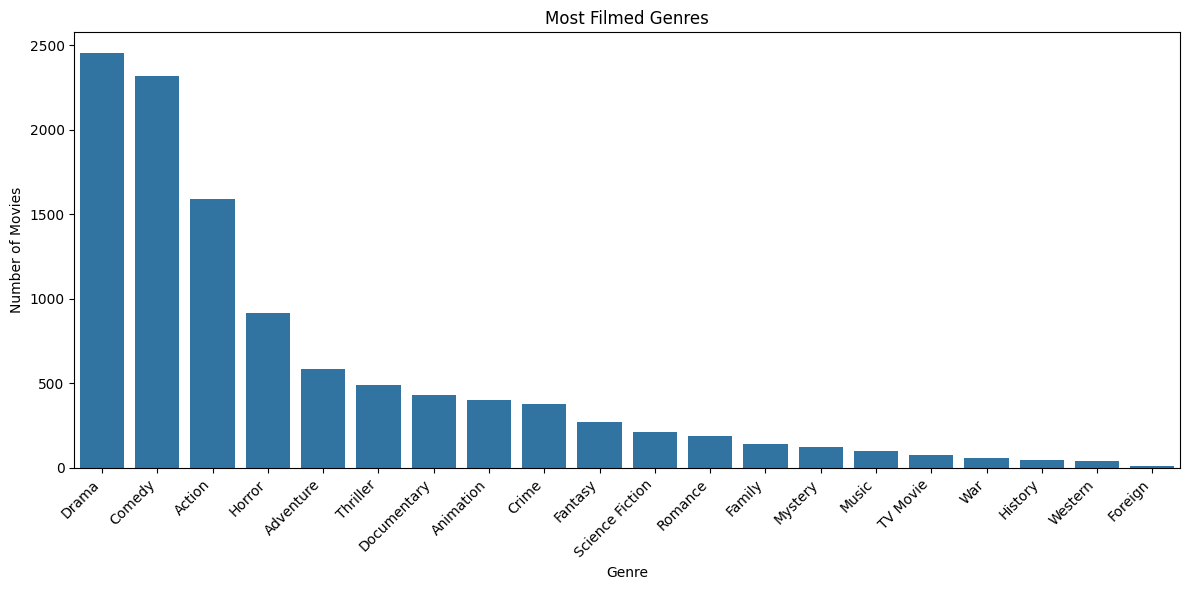

In [36]:
# prompt: What are the most filmed genres in this whole dataset? make a bar chart

# Count the occurrences of each genre
genre_counts = df['genres'].value_counts()

# Create a bar chart of the most frequent genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Most Filmed Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [37]:
df['genres'].describe()

,genres
count,10842
unique,20
top,Drama
freq,2453


from the above graph, we can see that Drama, Comedy and Action are the most three filmed genres in total of 10839 movies in our dataset, and that Drama genre is filmed 22.6% of the times on our dataset.

***Q3: Is there a correlation between a movie budget and its revenue?***

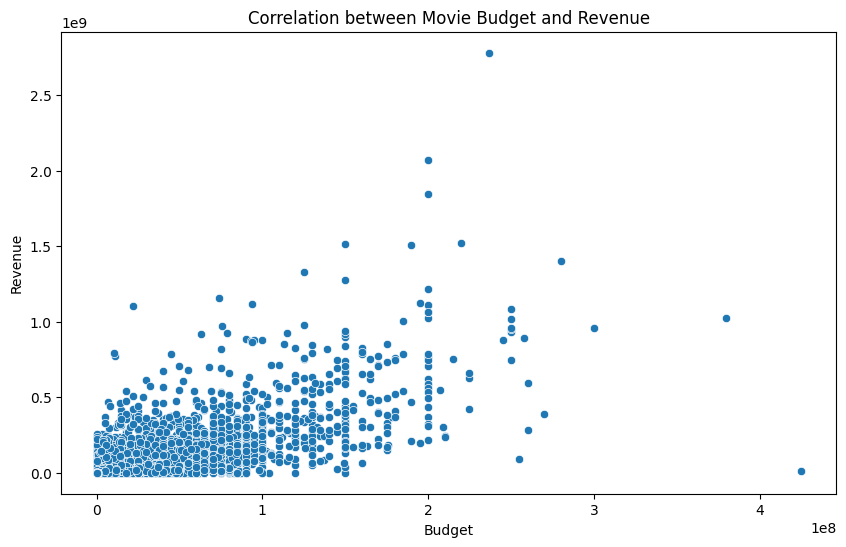

In [38]:

# Q3: Correlation between movie budget and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Correlation between Movie Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

We can notice the positive correlation between budget and revenue, indecating a relation between them with little outliers.

## Conclusions

Q1: Do movies with high popularity achive high revenvue?

Ans : More popular movies recieve way more revenue than the less popular movies.

Q2: What are the most filmed genres in this whole dataset?

Ans : Drama, Comedy and Action are the most three filmed genres in total of 10839 movies in our dataset, and that Drama genre is filmed 22.6% of the times on our dataset.

Q3: Is there a correlation between a movie budget and its revenue?

Ans:There is positive correlation between budget and revenue, indecating a relation between them with little outliers.